In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
from IPython.display import Image  
import pydotplus

# Configuring the notebook
sns.set()
%matplotlib inline

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df['Class'].unique()

array([0, 1])

/home/collins/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/collins/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/collins/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

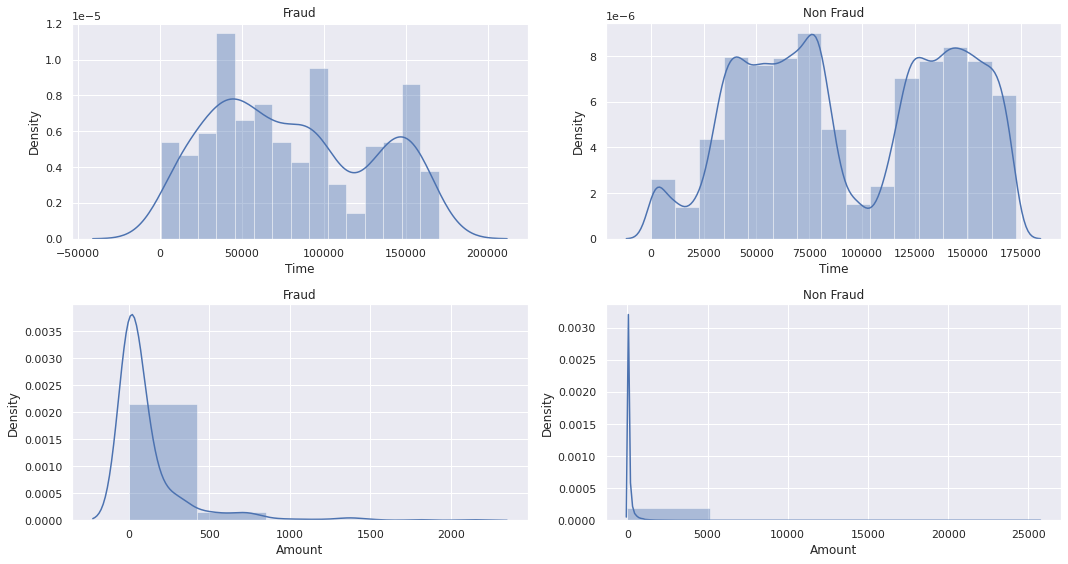

In [6]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
sns.distplot(df['Time'][df['Class'] == 1], bins=15, ax=ax1)
sns.distplot(df['Time'][df['Class'] == 0], bins=15, ax=ax2)

sns.distplot(df['Amount'][df['Class'] == 1], bins=5, ax=ax3)
sns.distplot(df['Amount'][df['Class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')
plt.tight_layout()
plt.show()

/home/collins/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


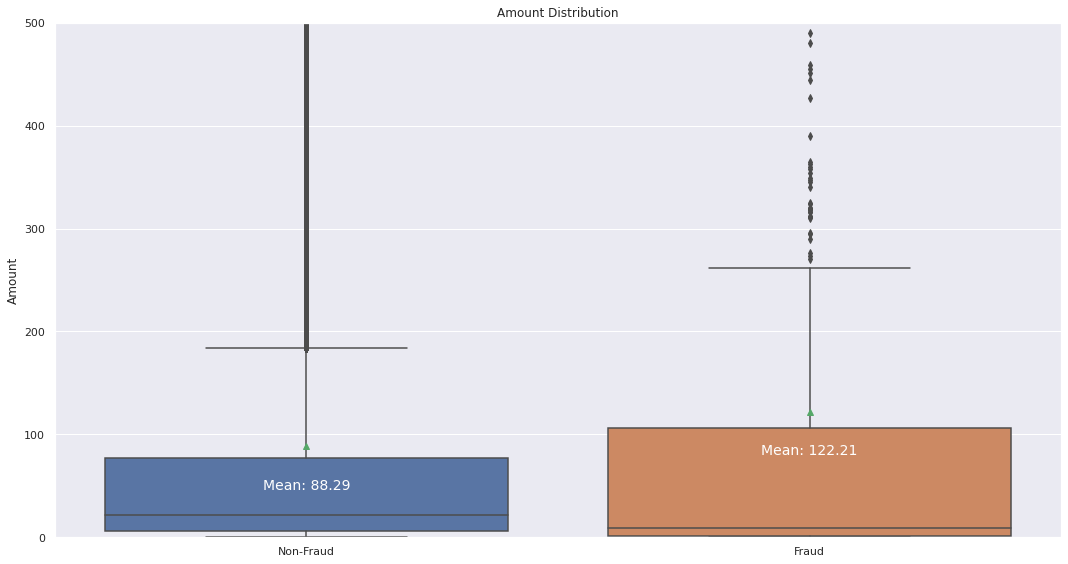

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

box_plot = sns.boxplot(df['Class'], df['Amount'], showmeans=True, ax=ax)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
ax.set_ylim(0, 500)
ax.set_title('Amount Distribution')
ax.set_xlabel('')

means = df.groupby(['Class'])['Amount'].mean()
vertical_offset = df['Amount'].mean() - 130 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, f'Mean: {round(means[xtick], 2)}', 
            horizontalalignment='center', fontsize=14, color='w')

plt.tight_layout()
plt.show()

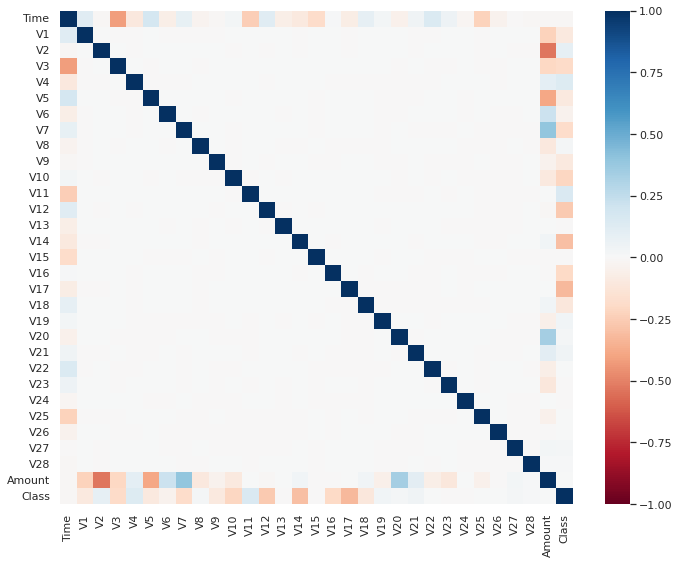

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()

0    0.998273
1    0.001727
Name: Class, dtype: float64


/home/collins/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


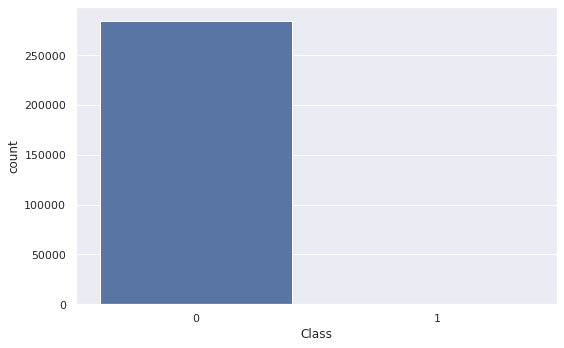

In [9]:
print(df['Class'].value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(df['Class'])

plt.tight_layout()
plt.show()

In [10]:
scaler = StandardScaler()

df['std_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['std_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Amount', 'Time'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

0    0.5
1    0.5
Name: Class, dtype: float64


/home/collins/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


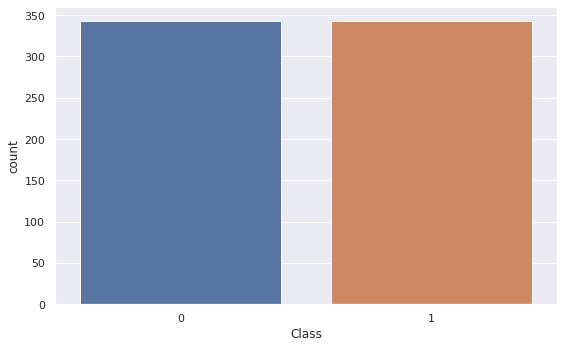

In [12]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(pd.Series(y_rus).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)

plt.tight_layout()
plt.show()

/home/collins/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


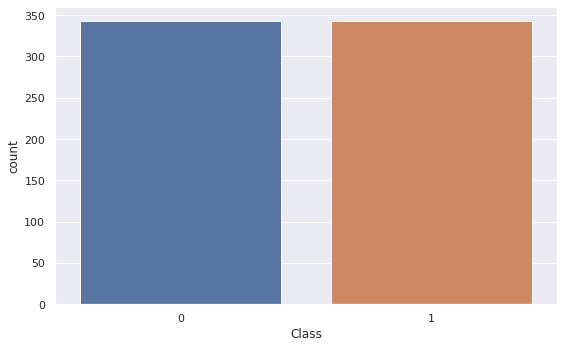

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)

plt.tight_layout()
plt.show()

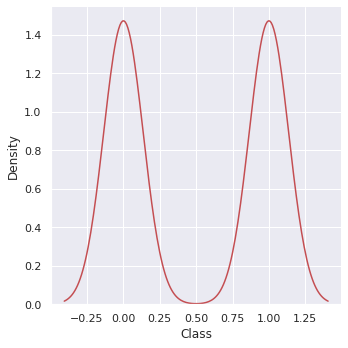

In [27]:
# fig, ax = plt.subplots(figsize=(8,5))
a=sns.displot(y_rus,kind='kde',color="r")


# plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85294
           1       0.03      0.90      0.06       149

    accuracy                           0.95     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.95      0.97     85443



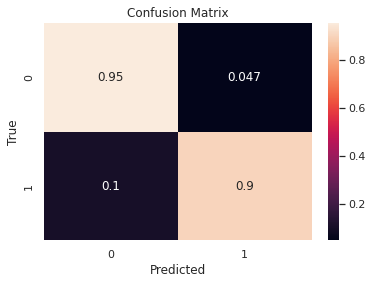

ROC AUC Score: 0.926


In [14]:
log_reg_under = LogisticRegression()

log_reg_under.fit(X_rus, y_rus)

y_pred_log_under = log_reg_under.predict(X_test)


def report(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, pred), 4)}')

report(y_pred_log_under)

In [16]:
#leave one participant out cross-validation
results_lr <- rep(NA, nrow(data_to_use))
results_tree <- rep(NA, nrow(data_to_use))
results_svm <- rep(NA, nrow(data_to_use))
results_rf <- rep(NA, nrow(data_to_use))

for(index_subj  in 1:nrow(data_to_use))
{
  #remove subject to validate
  training_data <- data_to_use[-index_subj, ]
  training_data_formula <- training_data[, c("preterm", features)]
  
  #select features in the validation set
  validation_data <- data_to_use[index_subj, features]
  
  #logistic regression
  glm.fit <- glm(preterm ~.,
                 data = X_rus,
                 family = binomial)
  glm.probs <- predict(glm.fit, y_rus, type = "response")
  predictions_lr <- ifelse(glm.probs < 0.5, "t", "f")
  results_lr[index_subj] <- predictions_lr
  
  #classification tree
  tree.fit <- tree(preterm ~.,
                   data = training_data_formula)
  predictions_tree <- predict(tree.fit, validation_data, type = "class")
  results_tree[index_subj] <- predictions_tree
  
  #svm
  svm <- svm(preterm ~.,
             data = training_data_formula
  )
  predictions_svm <- predict(svm, validation_data)
  results_svm[index_subj] <- predictions_svm
  

SyntaxError: invalid syntax (<ipython-input-16-3bc317ea4c61>, line 7)

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

preds = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)

auc = roc_auc_score(y_test, preds)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

NameError: name 'model' is not defined

In [18]:
  #logistic regression
  glm.fit <- glm(preterm,
                 data = X_rus,
                 family = binomial)
  glm.probs <- predict(glm.fit, y_rus, type = "response")
  predictions_lr <- ifelse(glm.probs < 0.5, "t", "f")

NameError: name 'glm' is not defined